# **WORD2VEC & PMI**

Summary:


1.   Import *narco_schedule*
2.   Import Word2Vec and Train Models
3.   Relevant Terms
4.   Relevance along Temporal Dimension
5.   Correlation among Terms




---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import sys
sys.path.append('/content/drive/My Drive/Università/inforet_prj/')

In [5]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()
import pandas as pd
import pickle
import string
import seaborn as sns; sns.set()
from scipy.stats import norm
from matplotlib import pyplot
import matplotlib.pyplot as plt
import math
from nltk import ngrams
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

## **1. Import narco_schedule**

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/narco_schedule.pkl", "rb") as f:
  narco_schedule = pickle.load(f)

In [ ]:
narco_schedule = narco_schedule.loc[(narco_schedule.schedule == "narco_1") | (narco_schedule.schedule == "narco_2")  ] 

## **2. Import Word2Vec and Train Models**

In [ ]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

In [ ]:
EMBEDDING_FILE = '/root/input/GoogleNews-vectors-negative300.bin.gz'
word_vectors = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

In [ ]:
narcos = ['narco_1', 'narco_2']

In [ ]:
n = 5
sequences = {}
for nar in narcos:
    for sched, x in tqdm(zip(narco_schedule.schedule, narco_schedule.lemmatized), total=narco_schedule.shape[0]):
        penta_gram = ngrams(x.split(), n)

        sequences[sched] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

In [ ]:
import itertools
dict(itertools.islice(sequences.items(), 1))

---

In [ ]:
models = {}
for sched, sequence in sequences.items():
    models[sched] = Word2Vec(sequences[sched], min_count=10)

In [ ]:
import itertools
dict(itertools.islice(models.items(), 2))

---

In [ ]:
#with open("/content/drive/MyDrive/Università/inforet_prj/models.pkl", "wb") as f:
#    pickle.dump(models, f)

---

## **3. Relevant Terms**

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models.pkl", "rb") as f:
  models = pickle.load(f)

---

### *3.1 Cosine similarity own narcotics*

In [ ]:
schedule_1 = ["cannabis",  "marijuana",  "lsd", "heroin", "ecstasy", "peyote", "mescaline", "mda" , 'methaqualone', "mdma", 'methaqualone' ]
schedule_2 = ["cocaine", "methamphetamine", "dilaudid", "meperidine", "demerol",  "dexedrine", "fentanyl", "ritalin", "methadone", "amphetamine", "phencyclidine", "pseudoephedrine", "ephedrine", "opium", "dilaudid", "preludin", "hydromorphone", 'oxycodone'] 

In [ ]:
schedules = schedule_1 + schedule_2

In [ ]:
for sched, model in models.items():
    print(sched)

In [ ]:
for sched, model in models.items():
    if sched == 'narco_1':
        for y in schedule_1:
            if y in model.wv.vocab:
                print(sched, y, [(x[0], round(x[1], 2)) for x in model.wv.most_similar(positive=y)][:5])
    elif sched == 'narco_2':
        for y in schedule_2:
            if y in model.wv.vocab:
                print(sched, y, [(x[0], round(x[1], 2)) for x in model.wv.most_similar(positive=y)][:5])

narco_1 cannabis [('marijuana', 0.57), ('heroin', 0.56), ('sativa', 0.56), ('substance', 0.54), ('manufacture', 0.53)]
narco_1 marijuana [('cannabis', 0.57), ('pot', 0.54), ('reefer', 0.53), ('underage', 0.53), ('liquor', 0.5)]
narco_1 lsd [('gram', 0.63), ('tablet', 0.62), ('diacetyl', 0.62), ('barbituric', 0.61), ('homogeneous', 0.61)]
narco_1 heroin [('narcotic', 0.75), ('drug', 0.63), ('cannabis', 0.56), ('tinfoil', 0.55), ('capsule', 0.53)]
narco_1 ecstasy [('pill', 0.66), ('pentazocine', 0.59), ('cellophane', 0.59), ('sandwich', 0.57), ('dagger', 0.56)]
narco_1 peyote [('administering', 0.71), ('antidepressant', 0.7), ('topical', 0.7), ('riminal', 0.66), ('adrenalin', 0.64)]
narco_1 mescaline [('morphine', 0.69), ('ingestion', 0.67), ('bile', 0.67), ('sedative', 0.64), ('milligram', 0.64)]
narco_1 mda [('placemat', 0.76), ('recodifie', 0.72), ('vile', 0.72), ('consignment', 0.72), ('sifter', 0.71)]
narco_1 methaqualone [('mda', 0.63), ('homogeneous', 0.59), ('vile', 0.59), ('plac

In [ ]:
def most_similar_list_value(model_, word, n):
    lista = []
    for sched, model in model_.items():
        if word in model.wv.vocab:
            for x in model.wv.most_similar(positive=word)[:n]:
                lista.append([x[0],round(x[1], 2)])
    return lista

In [ ]:
narco_1_cannabis = most_similar_list_value(models, 'cannabis', 10)
narco_1_marijuana = most_similar_list_value(models, 'marijuana', 10)
narco_1_lsd = most_similar_list_value(models, 'lsd', 10)
narco_1_heroin = most_similar_list_value(models, 'heroin', 10)
narco_1_mdma = most_similar_list_value(models, 'mdma', 10)

terms_narco_1 = pd.concat([pd.DataFrame(narco_1_cannabis, columns=['cannabis', 'value']), 
                           pd.DataFrame(narco_1_marijuana, columns=['marijuana', 'value']), 
                           pd.DataFrame(narco_1_lsd, columns=['lsd', 'value']), 
                           pd.DataFrame(narco_1_heroin, columns=['heroin', 'value']), 
                           pd.DataFrame(narco_1_mdma, columns=['mdma', 'value'])],                                              
                           axis=1)
terms_narco_1

,cannabis,value,marijuana,value,lsd,value,heroin,value,mdma,value
0,marijuana,0.57,cannabis,0.57,gram,0.63,narcotic,0.75,tablet,0.60
1,heroin,0.56,pot,0.54,tablet,0.62,drug,0.63,homogeneous,0.58
2,sativa,0.56,reefer,0.53,diacetyl,0.62,cannabis,0.56,lsd,0.55
3,substance,0.54,underage,0.53,barbituric,0.61,tinfoil,0.55,placemat,0.55
4,manufacture,0.53,liquor,0.50,homogeneous,0.61,capsule,0.53,resin,0.54
5,contraband,0.53,telegram,0.49,mda,0.61,dope,0.53,randomly,0.53
6,gram,0.53,junk,0.49,controlled,0.59,gram,0.52,crumble,0.52
7,plant,0.50,whiskey,0.49,powdered,0.59,pill,0.50,grain,0.51
8,drug,0.49,dope,0.48,derivative,0.57,powder,0.49,crushed,0.51
9,methaqualone,0.46,cider,0.48,indole,0.57,tablet,0.48,medicinal,0.51


In [ ]:
narco_2_cocaine = most_similar_list_value(models, 'cocaine', 10)
narco_2_methamphetamine = most_similar_list_value(models, 'methamphetamine', 10)
narco_2_amphetamine = most_similar_list_value(models, 'amphetamine', 10)
narco_2_pseudoephedrine = most_similar_list_value(models, 'pseudoephedrine', 10)
narco_2_phencyclidine = most_similar_list_value(models, 'phencyclidine', 10)

terms_narco_2 = pd.concat([pd.DataFrame(narco_2_cocaine, columns=['cocaine', 'value']), 
                           pd.DataFrame(narco_2_methamphetamine, columns=['methamphetamine', 'value']),
                           pd.DataFrame(narco_2_amphetamine, columns=['amphetamine', 'value']),
                           pd.DataFrame(narco_2_pseudoephedrine, columns=['pseudoephedrine', 'value']), 
                           pd.DataFrame(narco_2_phencyclidine, columns=['phencyclidine', 'value'])],
                          axis=1)
terms_narco_2

,cocaine,value,methamphetamine,value,amphetamine,value,pseudoephedrine,value,phencyclidine,value
0,drug,0.72,pseudoephedrine,0.70,pill,0.70,ephedrine,0.73,mixture,0.69
1,narcotic,0.69,phencyclidine,0.56,caffeine,0.70,methamphetamine,0.70,salt,0.68
2,amphetamine,0.55,manufacture,0.56,tablet,0.69,capsule,0.68,hydrochloric,0.67
3,powder,0.55,ephedrine,0.52,phencyclidine,0.65,tablet,0.66,acid,0.66
4,gram,0.54,manufacturing,0.52,capsule,0.65,pill,0.64,hydrochloride,0.66
5,sixteenth,0.54,mixture,0.51,barbiturate,0.64,filter,0.63,amphetamine,0.65
6,kilogram,0.52,cocaine,0.51,milligram,0.64,milligram,0.63,isomer,0.64
7,coke,0.51,simulation,0.50,hydrochloride,0.64,mixture,0.62,caffeine,0.64
8,methamphetamine,0.51,pill,0.49,morphine,0.63,salt,0.62,barbituric,0.64
9,substance,0.50,ingredient,0.49,grain,0.61,precursor,0.61,opium,0.63


---

### *3.2 Cosine similarity with list of shared terms*

List of shared terms = 'drug', 'narcotic', 'substance', 'crime', 'addiction'

In [ ]:
def most_similar_list_schedule_shared(model_, narcos, word, n):
    lista = []
    for sched, model in model_.items():
        if sched == narcos:
            for x in model.wv.most_similar(positive=word)[:n]:
                lista.append(x[0])
    return lista

In [ ]:
lista_drug_1 = most_similar_list_schedule_shared(models, 'narco_1', 'drug', 10)
lista_narcotic_1 = most_similar_list_schedule_shared(models, 'narco_1', 'narcotic', 10)
lista_substance_1 = most_similar_list_schedule_shared(models, 'narco_1','substance', 10)
lista_crime_1 =  most_similar_list_schedule_shared(models, 'narco_1','crime', 10)
lista_addiction_1 =  most_similar_list_schedule_shared(models,'narco_1', 'addiction', 10)
lista_drug_2 = most_similar_list_schedule_shared(models,'narco_2', 'drug', 10)
lista_narcotic_2 = most_similar_list_schedule_shared(models,'narco_2','narcotic', 10)
lista_substance_2 = most_similar_list_schedule_shared(models,'narco_2', 'substance', 10)
lista_crime_2 =  most_similar_list_schedule_shared(models,'narco_2','crime', 10)
lista_addiction_2 =  most_similar_list_schedule_shared(models, 'narco_2','addiction', 10)

In [ ]:
similar_compare_drug = pd.concat([pd.DataFrame(lista_drug_1, columns=['drug_1']),  pd.DataFrame(lista_drug_2, columns=['drug_2'])], axis=1)
similar_compare_narcotic = pd.concat([pd.DataFrame(lista_narcotic_1, columns=['narcotic_1']),  pd.DataFrame(lista_narcotic_2, columns=['narcotic_2'])], axis=1)
similar_compare_substance = pd.concat([pd.DataFrame(lista_substance_1, columns=['substance_1']),  pd.DataFrame(lista_substance_2, columns=['substance_2'])], axis=1)
similar_compare_crime = pd.concat([pd.DataFrame(lista_crime_1, columns=['crime_1']),  pd.DataFrame(lista_crime_2, columns=['crime_2'])], axis=1)
similar_compare_addiction = pd.concat([pd.DataFrame(lista_addiction_1, columns=['addiction_1']),  pd.DataFrame(lista_addiction_2, columns=['addiction_2'])], axis=1)

In [ ]:
df_common_terms = pd.concat([similar_compare_drug, similar_compare_narcotic, similar_compare_substance, similar_compare_addiction ], axis=1)
df_common_terms

,drug_1,drug_2,narcotic_1,narcotic_2,substance_1,substance_2,addiction_1,addiction_2
0,heroin,narcotic,heroin,drug,tablet,phencyclidine,addict,drunkenness
1,narcotic,cocaine,drug,cocaine,cannabis,gram,dependency,addict
2,dope,buying,buyer,contraband,lsd,cocaine,habit,craving
3,junk,amphetamine,dope,substance,gram,narcotic,usage,usage
4,cannabis,occasional,contraband,occasional,manufacturing,profiteer,user,abuser
5,profiteer,consummate,illicit,amphetamine,barbituric,amphetamine,pusher,alcoholism
6,shoplift,ongoing,cannabis,middleman,pill,purveyor,abuser,relapse
7,marijuana,dope,consummate,paraphernalia,pentazocine,drug,overdose,abstain
8,abuser,profit,junk,methamphetamine,chemical,powder,withdrawal,overdose
9,codeine,substance,pusher,ongoing,capsule,isomer,alcoholism,dependence


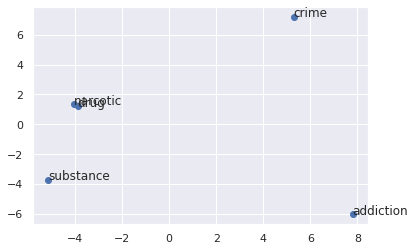

In [ ]:
for sched, model in models.items():    
    X = model.wv[shared_terms]
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(shared_terms):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [ ]:
pd.concat([similar_compare_drug, similar_compare_narcotic, similar_compare_substance, similar_compare_crime, similar_compare_addiction ], axis=1)

,drug_1,drug_2,narcotic_1,narcotic_2,substance_1,substance_2,crime_1,crime_2,addiction_1,addiction_2
0,narcotic,narcotic,heroin,drug,lsd,phencyclidine,offense,offense,addict,craving
1,heroin,cocaine,drug,cocaine,tablet,cocaine,killing,peijury,habit,drunkenness
2,dope,meperdine,dope,contraband,cannabis,gram,murder,murder,usage,addict
3,junk,clandestinely,buyer,clandestinely,gram,narcotic,felony,killing,pusher,abuser
4,cannabis,dope,junk,substance,heroin,profiteer,consitute,homicide,dependency,overdose
5,organizer,amphetamine,marijuana,meperdine,capsule,chemical,robbery,shooting,ingest,usage
6,transportation,profit,contraband,methamphetamine,quantity,amphetamine,satis,burglary,user,alcoholism
7,petty,substance,output,seller,pill,drug,perjury,perjury,chronic,anticonvulsive
8,embalming,consummate,pusher,amphetamine,manufacturing,powder,burglary,wrongdoing,alcoholism,relapse
9,dispense,methamphetamine,illicit,ongoing,material,classifie,homicide,robbery,overdose,bronchodilator


---

Here we investigate the difference of top similar terms between models trained differently.



In [ ]:
# Word2Vec trained on Google News data.
word_vectors.most_similar('drug')

[('drugs', 0.8491184711456299),
 ('Drug', 0.7462924122810364),
 ('narcotics', 0.6429657936096191),
 ('cocaine', 0.6090095043182373),
 ('heroin', 0.6076127886772156),
 ('narcotic', 0.6070550680160522),
 ('prescription_drugs', 0.5968070030212402),
 ('illicit_drugs', 0.5944103598594666),
 ('prescription_drug', 0.5941191911697388),
 ('painkiller_Oxycodone', 0.5939620137214661)]

In [ ]:
# Word2Vec trained on both Schedule I and Schedule II Illinois Bulk Data.
for sched, model in models.items():
        print(model.wv.most_similar(positive='drug')[0:10])

[('heroin', 0.6244809031486511), ('narcotic', 0.6018561720848083), ('dope', 0.5852581262588501), ('cannabis', 0.5314615368843079), ('junk', 0.5080208778381348), ('stash', 0.4647700786590576), ('transportation', 0.4563524127006531), ('marijuana', 0.4519568085670471), ('abuser', 0.44541895389556885), ('shoplift', 0.44376879930496216)]
[('narcotic', 0.805453896522522), ('cocaine', 0.7334312200546265), ('dope', 0.48488348722457886), ('amphetamine', 0.4803611636161804), ('profit', 0.47907787561416626), ('occasional', 0.4749113917350769), ('buying', 0.4705352187156677), ('consummate', 0.4631741940975189), ('methamphetamine', 0.45951715111732483), ('substance', 0.45590248703956604)]


---

## **4. Relevance along Temporal Dimension**

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/narco_time.pkl", "rb") as f:
  narco_time = pickle.load(f)

In [ ]:
years = ['50s', '60s', '70s', '80s', '90s', '00s']

In [ ]:
n = 5
sequences_time = {}
for year in years:
    for year, x in tqdm(zip(narco_time.year, narco_time.lemmatized), total=narco_time.shape[0]):
        penta_gram = ngrams(x.split(), n)

        sequences_time[year] = ([[y[0], y[1], y[2], y[3], y[4]] for y in penta_gram])

In [ ]:
models_time = {}
for year, sequence in sequences_time.items():
    models_time[year] = Word2Vec(sequences_time[year], min_count=10)

In [ ]:
#with open("/content/drive/MyDrive/Università/inforet_prj/models_time.pkl", "wb") as f:
#    pickle.dump(models_time, f)

---

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/models_time.pkl", "rb") as f:
    models_time = pickle.load(f)

In [ ]:
def most_similar_list_time(st_time(model_, time, word, n):
    for year, model in model_.items():
        if year == time:
            for x in model.wv.most_similar(positive=word)[:n]:
                print(year, x[0], x[1])

In [ ]:
most_similar_list_time(models_time, '00s','drug', 2)

00s narcotic 0.7557021379470825
00s cannabis 0.6491005420684814


---

### *4.1 Similarity betweeen words along temporal dimesion*

In [ ]:
def similarity_2_words_time(model_, word1, word2):
    print('(' , word1 , '-' , word2, ')')
    for year, model in model_.items():
        try:
            print(year, round(model.wv.similarity( word1, word2 ), 3) )
        except:
            print(year, 'No data to display')

In [ ]:
similarity_2_words_time(list_models_time_schedule_1, 'drug', 'cannabis')

( drug - cannabis )
50s 0.991
60s 0.623
70s 0.352
80s 0.292
90s 0.396
00s 0.534


---

## **5. Correlation among Terms**

In [4]:
narco_1_pmi = pd.read_csv("/content/drive/MyDrive/Università/inforet_prj/narco_1_pmi_nlp.csv", sep="|" , names = ['sent_clean'], header=None)

In [5]:
narco_1_pmi = narco_1_pmi.loc[(narco_1_pmi.sent_clean == '')|(~pd.isna(narco_1_pmi.sent_clean))]

In [6]:
narco_2_pmi = pd.read_csv("/content/drive/MyDrive/Università/inforet_prj/narco_2_pmi_nlp.csv", sep="|" , names = ['sent_clean'], header=None)

In [7]:
narco_2_pmi = narco_2_pmi.loc[(narco_2_pmi.sent_clean == '')|(~pd.isna(narco_2_pmi.sent_clean))]

### *5.1 Single Terms co-occurrence Matrix*

In [8]:
def get_co_pmi_value(word1, word2, matrix):
    return matrix.loc[matrix.index == word1, [word2]]

In [9]:
def pmi(df, positive=True):
    col_totals = df.sum(axis=0)
    total = col_totals.sum()
    row_totals = df.sum(axis=1)
    expected = np.outer(row_totals, col_totals) / total
    df_pmi = df / expected
    # Silence distracting warnings about log(0):
    with np.errstate(divide='ignore'):
        df_pmi = np.log(df_pmi)
    df_pmi[np.isinf(df_pmi)] = 0.0  # log(0) = 0
    if positive:
        df_pmi[df_pmi < 0] = 0.0
    return df_pmi

#### *5.1.1 Co-occurrence schedule I*

In [10]:
vect_1_pmi = CountVectorizer(min_df=0.01)
X_1_pmi = vect_1_pmi.fit_transform(narco_1_pmi.sent_clean)

In [11]:
df_1_pmi = pd.DataFrame(X_1_pmi.todense(), columns=vect_1_pmi.vocabulary_)

In [12]:
df_1_pmi_asint = df_1_pmi.astype(int)
coocc_1_pmi = df_1_pmi_asint.T.dot(df_1_pmi_asint)

In [ ]:
coocc_1_pmi.values[[np.arange(coocc_1_pmi.shape[0])]*2] = 0

In [14]:
coocc_1_pmi

,appeal,order,petition,contend,convict,follow,jury,trial,unlawful,defendant,proceeding,sentence,probation,second,allege,charge,possession,receive,present,motion,arrest,suppress,evidence,cross,prosecution,witness,fail,testimony,apartment,find,argument,request,year,statute,time,conduct,drug,report,use,hearing,...,observe,act,control,doubt,rule,prove,term,determine,require,grant,warrant,concern,section,offense,record,sufficient,discretion,car,leave,note,case,involve,indicate,probable,murder,factor,vehicle,finding,conclude,apply,go,plaintiff,public,child,death,instruction,impose,narcotic,ground,respondent
appeal,0,83,74,11,42,154,55,14,104,43,55,181,82,95,140,40,116,54,212,74,122,26,63,67,424,360,160,153,81,30,378,50,92,345,108,46,133,65,128,355,...,192,23,21,44,31,60,135,158,80,55,260,22,211,65,46,81,275,104,168,55,40,95,108,29,64,38,57,27,100,149,321,430,97,83,58,214,108,99,67,154
order,83,0,20,23,44,87,38,6,72,32,64,108,44,16,74,15,39,63,66,47,60,14,23,46,364,56,71,112,178,12,38,44,67,121,60,26,58,37,18,50,...,104,12,21,41,60,16,80,38,68,51,135,9,25,13,33,47,213,55,95,43,3,37,61,20,124,4,40,33,38,64,134,303,24,30,51,45,68,49,25,38
petition,74,20,0,8,30,68,50,108,131,33,22,144,83,32,171,79,56,26,45,41,59,34,73,19,58,135,47,52,74,24,74,62,54,40,85,64,169,34,50,230,...,103,32,39,37,61,71,75,136,116,30,63,65,65,19,33,57,191,544,27,22,70,48,49,58,94,162,27,73,250,508,240,842,32,68,35,114,58,67,206,106
contend,11,23,8,0,19,4,13,4,143,13,7,11,18,64,17,4,25,10,17,27,7,1,5,13,123,42,14,22,22,1,8,9,21,14,12,6,8,18,15,532,...,12,1,205,26,11,52,15,10,30,4,19,1,352,48,58,12,201,25,19,9,13,11,21,73,13,3,29,2,5,25,29,481,22,10,4,3,12,13,11,53
convict,42,44,30,19,0,31,26,14,59,32,36,48,66,23,74,54,50,46,44,40,33,18,44,36,77,106,61,55,53,25,33,38,31,62,51,34,25,25,13,84,...,52,34,24,34,40,32,49,103,73,42,103,17,141,55,43,33,138,143,39,25,42,35,40,30,33,49,58,35,120,122,134,395,17,40,20,28,28,44,60,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
instruction,214,45,114,3,28,76,41,189,45,38,21,147,92,99,72,74,108,28,68,41,78,36,206,35,136,111,59,61,82,60,115,56,50,160,110,23,83,15,37,104,...,78,46,15,32,20,182,32,111,40,54,66,156,120,70,32,95,228,256,36,56,9,38,85,14,101,206,42,11,387,403,235,407,13,82,55,0,7,25,154,156
impose,108,68,58,12,28,188,18,5,96,19,41,94,48,20,231,28,31,19,77,38,51,16,88,42,89,323,21,50,56,11,126,21,46,82,52,80,102,79,121,134,...,95,23,18,26,187,25,140,66,197,46,522,18,138,33,77,32,116,88,169,197,126,27,26,94,43,25,79,22,49,66,117,335,124,93,196,7,0,82,47,81
narcotic,99,49,67,13,44,109,58,334,181,115,92,172,87,11,1105,40,62,21,236,157,235,36,82,124,660,137,21,338,75,43,173,52,131,151,93,140,175,66,13,86,...,119,81,31,87,68,18,116,126,3300,70,99,43,57,11,93,119,348,121,62,126,69,271,271,383,94,66,42,82,178,121,295,570,81,89,128,25,82,0,65,33
ground,67,25,206,11,60,151,235,104,164,104,32,256,246,30,213,237,134,160,115,82,192,418,100,88,100,245,63,178,153,74,81,185,75,117,222,72,215,42,73,356,...,122,50,62,153,77,72,172,259,87,77,42,194,96,33,59,144,438,757,29,26,71,143,169,125,92,209,23,75,1217,2066,540,1957,22,168,25,154,47,65,0,134


In [15]:
with open("/content/drive/MyDrive/Università/inforet_prj/coocc_1_pmi.pkl", "wb") as f:
    pickle.dump(coocc_1_pmi, f)

In [17]:
get_co_pmi_value('follow', 'order', coocc_1_pmi)

,order
follow,87


In [18]:
pmi_matrix_1_pmi = pmi(coocc_1_pmi, positive=True)
pmi_matrix_1_pmi

,appeal,order,petition,contend,convict,follow,jury,trial,unlawful,defendant,proceeding,sentence,probation,second,allege,charge,possession,receive,present,motion,arrest,suppress,evidence,cross,prosecution,witness,fail,testimony,apartment,find,argument,request,year,statute,time,conduct,drug,report,use,hearing,...,observe,act,control,doubt,rule,prove,term,determine,require,grant,warrant,concern,section,offense,record,sufficient,discretion,car,leave,note,case,involve,indicate,probable,murder,factor,vehicle,finding,conclude,apply,go,plaintiff,public,child,death,instruction,impose,narcotic,ground,respondent
appeal,0.000000,0.376650,0.000000,0.000000,0.000000,0.560284,0.000000,0.000000,0.000000,0.000000,0.092855,0.194741,0.000000,0.199399,0.000000,0.000000,0.374737,0.000000,0.772757,0.032648,0.095031,0.000000,0.000000,0.031193,0.816111,0.519960,0.440549,0.279566,0.000000,0.000000,1.335461,0.000000,0.148941,1.057634,0.000000,0.000000,0.093097,0.000000,0.530062,0.387627,...,0.651848,0.000000,0.000000,0.0,0.000000,0.000000,0.336347,0.293662,0.000000,0.000000,0.672099,0.000000,0.000000,0.000000,0.000000,0.083397,0.116360,0.000000,0.738190,0.000000,0.000000,0.101179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.255442,0.000000,0.245017,0.000000,0.000000,0.951700,0.403505,0.0,0.000000,0.000000
order,0.376650,0.000000,0.000000,0.172515,0.510458,0.663476,0.066491,0.000000,0.000000,0.156379,0.918641,0.352611,0.000000,0.000000,0.000000,0.000000,0.000000,0.467932,0.280061,0.252967,0.059591,0.000000,0.000000,0.329378,1.337768,0.000000,0.302292,0.641863,1.281733,0.000000,0.000000,0.204251,0.506082,0.684117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.712980,0.000000,0.000000,0.0,0.555809,0.000000,0.487335,0.000000,0.000000,0.522543,0.690928,0.000000,0.000000,0.000000,0.058622,0.213332,0.535117,0.000000,0.842340,0.193752,0.000000,0.000000,0.058733,0.000000,1.304261,0.000000,0.000000,0.060870,0.000000,0.000000,0.056077,0.000000,0.000000,0.000000,0.214107,0.066622,0.615118,0.0,0.000000,0.000000
petition,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.538659,0.000000,0.000000,0.000000,0.153483,0.000000,0.000000,0.000000,0.000509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.060385,0.000000,0.000000,0.000000,0.011276,0.520072,0.000000,0.000000,0.141014,...,0.216507,0.000000,0.000000,0.0,0.085527,0.000000,0.000000,0.331148,0.000000,0.000000,0.000000,0.163588,0.000000,0.000000,0.000000,0.000000,0.000000,1.230800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.540464,0.620906,0.000000,0.368011,0.225471,0.876827,0.152065,0.186919,0.000000,0.000000,0.000000,0.509347,0.000000,0.0,0.259091,0.000000
contend,0.000000,0.172515,0.000000,0.000000,0.075682,0.000000,0.000000,0.000000,0.792704,0.000000,0.000000,0.000000,0.000000,0.883616,0.000000,0.000000,0.000000,0.000000,0.000000,0.103631,0.000000,0.000000,0.000000,0.000000,0.657773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.871363,...,0.000000,0.000000,2.299039,0.0,0.000000,0.561325,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.293178,0.589427,1.027532,0.000000,0.882105,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.594461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.518791,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
convict,0.000000,0.510458,0.000000,0.075682,0.000000,0.000000,0.000000,0.000000,0.000000,0.250602,0.437499,0.000000,0.209572,0.000000,0.000000,0.201078,0.301628,0.247661,0.000000,0.185921,0.000000,0.000000,0.000000,0.178478,0.000000,0.065754,0.244708,0.024920,0.164464,0.237177,0.000000,0.151870,0.000000,0.109683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.114055,0.236348,0.000000,0.0,0.244566,0.000000,0.091351,0.634255,0.000000,0.422610,0.514605,0.000000,0.067555,0.414807,0.417537,0.0

In [19]:
with open("/content/drive/MyDrive/Università/inforet_prj/pmi_matrix_1_pmi.pkl", "wb") as f:
    pickle.dump(pmi_matrix_1_pmi, f)

In [20]:
get_co_pmi_value('follow', 'order', pmi_matrix_1_pmi)

,order
follow,0.663476


#### *5.1.2 Co-occurrence Schedule II*

In [21]:
vect_2_pmi = CountVectorizer(min_df=0.01)
X_2_pmi = vect_2_pmi.fit_transform(narco_2_pmi.sent_clean)

In [22]:
df_2_pmi = pd.DataFrame(X_2_pmi.todense(), columns=vect_2_pmi.vocabulary_)

In [23]:
df_2_pmi_asint = df_2_pmi.astype(int)
coocc_2_pmi = df_2_pmi_asint.T.dot(df_2_pmi_asint)

In [ ]:
coocc_2_pmi.values[[np.arange(coocc_2_pmi.shape[0])]*2] = 0

In [25]:
coocc_2_pmi

,murder,criminal,jury,convict,determine,factor,sufficient,death,trial,sentence,defendant,term,year,review,appeal,argue,err,admit,evidence,find,apartment,allow,testimony,concern,order,examination,sentencing,defense,witness,testify,argument,question,impose,affirm,conviction,arrest,day,law,officer,report,...,motion,request,doubt,involve,receive,record,section,statute,set,prior,home,petition,attorney,finding,information,test,warrant,control,base,include,party,intent,charge,possession,reverse,bag,new,show,appellate,drive,case,claim,judgment,suppress,gun,occur,prosecutor,vehicle,respondent,plaintiff
murder,0,82,42,221,24,29,112,199,7,207,55,46,183,115,57,35,39,16,5,96,124,60,13,6,59,105,76,535,90,64,71,10,63,82,156,91,193,26,139,90,...,74,167,170,74,181,353,81,49,37,18,40,190,13,506,148,37,63,128,124,43,5,329,36,106,31,33,52,111,30,178,202,166,2057,94,3,111,50,14,126,227
criminal,82,0,20,82,13,59,157,66,27,104,54,77,205,111,124,62,152,51,20,223,83,137,14,66,94,513,381,125,173,129,106,21,593,51,113,348,158,43,107,97,...,189,27,291,30,50,68,27,206,69,115,97,261,23,177,67,41,76,324,151,217,56,87,70,165,30,67,70,61,39,86,148,294,602,138,59,288,107,111,83,114
jury,42,20,0,52,9,31,49,42,44,161,73,54,46,305,98,91,29,28,4,51,32,31,17,29,68,67,65,53,56,134,58,15,37,67,67,56,96,50,24,22,...,82,90,47,35,28,82,42,76,36,146,60,103,24,98,86,36,37,153,113,70,50,27,31,50,32,26,62,32,33,98,70,118,569,29,28,30,29,89,78,27
convict,221,82,52,0,4,53,83,125,117,185,28,33,268,143,199,106,73,61,50,82,37,76,47,107,23,76,150,90,52,133,359,33,111,98,110,66,114,64,202,67,...,64,82,82,39,28,62,59,137,117,84,65,88,105,103,109,39,95,258,887,31,52,105,60,62,57,79,273,32,87,340,659,248,1353,97,64,226,67,49,292,109
determine,24,13,9,4,0,24,9,21,2,175,324,15,15,50,30,3,23,9,3,45,46,10,2,5,9,112,21,10,16,22,30,1,7,6,33,14,15,8,10,47,...,24,22,28,4,226,58,26,21,2,31,19,43,1,445,48,66,7,202,30,24,10,51,8,27,78,6,3,25,9,3,29,17,607,14,22,15,24,22,11,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
occur,111,288,30,226,15,39,144,102,509,111,39,43,309,197,102,156,202,27,31,156,39,129,84,281,70,287,190,118,107,140,165,110,196,67,115,171,188,44,104,49,...,110,3,155,111,29,41,49,48,231,57,123,96,312,311,134,64,131,468,466,64,59,25,59,128,29,182,473,113,48,809,527,502,875,135,73,0,30,41,251,266
prosecutor,50,107,29,67,24,29,222,56,15,131,47,64,178,96,219,39,61,37,11,123,83,58,14,75,39,155,278,116,52,117,145,12,190,52,96,158,92,91,133,119,...,136,52,126,52,35,57,224,207,61,187,82,561,19,185,44,43,35,220,151,168,222,204,52,76,87,36,18,80,47,96,108,125,621,120,213,30,0,88,68,105
vehicle,14,111,89,49,22,43,111,91,267,105,40,134,250,125,918,103,72,50,34,259,116,224,32,99,61,639,83,24,313,85,150,24,145,66,149,181,100,109,124,96,...,155,19,104,51,21,170,58,132,60,3197,124,73,44,63,26,73,95,331,239,122,230,85,214,284,312,118,118,39,35,198,136,330,758,81,151,41,88,0,54,37
respondent,126,83,78,292,11,62,239,431,83,238,65,46,444,369,218,287,155,284,25,221,86,254,555,121,130,140,237,60,185,274,163,98,98,267,113,120,278,80,292,53,...,157,47,114,43,85,225,77,302,253,47,95,71,218,112,97,70,197,513,1179,46,33,113,101,190,146,86,314,36,100,1726,2317,466,2718,175,48,251,68,54,0,156


In [26]:
with open("/content/drive/MyDrive/Università/inforet_prj/coocc_2_pmi.pkl", "wb") as f:
    pickle.dump(coocc_2_pmi, f)

In [27]:
get_co_pmi_value('follow', 'order', coocc_2_pmi)

,order
follow,43


In [28]:
pmi_matrix_2_pmi = pmi(coocc_2_pmi, positive=True)
pmi_matrix_2_pmi

,murder,criminal,jury,convict,determine,factor,sufficient,death,trial,sentence,defendant,term,year,review,appeal,argue,err,admit,evidence,find,apartment,allow,testimony,concern,order,examination,sentencing,defense,witness,testify,argument,question,impose,affirm,conviction,arrest,day,law,officer,report,...,motion,request,doubt,involve,receive,record,section,statute,set,prior,home,petition,attorney,finding,information,test,warrant,control,base,include,party,intent,charge,possession,reverse,bag,new,show,appellate,drive,case,claim,judgment,suppress,gun,occur,prosecutor,vehicle,respondent,plaintiff
murder,0.000000,0.000000,0.000000,0.741427,0.000000,0.000000,0.199466,0.655286,0.000000,0.047597,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.668337,0.000000,0.000000,0.000000,0.050044,0.000000,0.000000,1.878295,0.000000,0.000000,0.00000,0.000000,0.000000,0.159199,0.539318,0.000000,0.234260,0.000000,0.172977,0.000000,...,0.000000,1.096135,0.454229,0.189573,1.106371,1.042295,0.131159,0.000000,0.000000,0.000000,0.000000,0.363444,0.000000,0.551449,0.210050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.725282,0.000000,0.023974,0.000000,0.000000,0.000000,0.211781,0.000000,0.000000,0.000000,0.000000,0.704805,0.019647,0.00000,0.000000,0.000000,0.000000,0.000000,0.397924
criminal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.431640,0.000000,0.000000,0.000000,0.000000,0.173207,0.000000,0.000000,0.000000,0.000000,0.495193,0.000000,0.0,0.559827,0.161323,0.164993,0.000000,0.000000,0.410228,1.066773,0.608920,0.318768,0.412205,0.000000,0.00000,0.000000,1.626270,0.000000,0.111276,0.929298,0.000000,0.000000,0.000000,0.000000,...,0.334527,0.000000,0.886180,0.000000,0.000000,0.000000,0.000000,0.681782,0.000000,0.000000,0.110672,0.575367,0.000000,0.000000,0.000000,0.000000,0.001149,0.129076,0.000000,0.824039,0.000000,0.000000,0.000000,0.360907,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.141503,0.000000,0.298032,0.00000,0.748824,0.248683,0.000000,0.000000,0.000000
jury,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.167471,0.379681,0.687287,0.507357,0.000000,1.258115,0.000000,0.207043,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.775413,0.000000,0.000000,0.149718,0.000000,0.666231,0.00000,0.000000,0.000000,0.540570,0.277553,0.000000,0.119316,0.123799,0.000000,0.000000,...,0.188471,1.061348,0.000000,0.024254,0.000000,0.165944,0.057777,0.373611,0.000000,0.307311,0.319277,0.334547,0.000000,0.000000,0.250583,0.066454,0.000000,0.067742,0.000000,0.381608,0.053333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003080,0.000000,0.00000,0.000000,0.000000,0.314174,0.000000,0.000000
convict,0.741427,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066201,0.437964,0.000000,0.000000,0.000000,0.183411,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.56147,0.000000,0.000000,0.213353,0.065849,0.000000,0.000000,0.000000,0.422677,0.000000,...,0.000000,0.260766,0.000000,0.000000,0.000000,0.000000,0.000000,0.255367,0.086368,0.000000,0.000000,0.000000,0.317822,0.000000,0.000000,0.000000,0.205773,0.000000,1.222436,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.107435,0.477407,0.000000,0.118455,0.108206,0.812304,0.000000,0.161787,0.000000,0.00000,0.487878,0.000000,0.000000,0.293071,0.000000
determine,0.000000,0.000000,0.000000,0.000000,0.000000,0.075824,0.000000,0.000000,0.000000,0.839890,2.554398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.025117,0.636922,0.000000,0.000000,0.000000,0.000000,0.610794,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.029408,0.000000,0.000000,2.288634,0.196495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.383212,0.044264

In [29]:
with open("/content/drive/MyDrive/Università/inforet_prj/pmi_matrix_2_pmi.pkl", "wb") as f:
    pickle.dump(pmi_matrix_2_pmi, f)

In [30]:
get_co_pmi_value('follow', 'order', pmi_matrix_2_pmi)

,order
follow,0.002148


----

#### *5.2.1 Bi-grams co-occurrences Schedule I*

In [31]:
vect_bigr_1_pmi = CountVectorizer(min_df=100, ngram_range=(2,2))
X_bigr_1_pmi = vect_bigr_1_pmi.fit_transform(narco_1_pmi.sent_clean)

In [ ]:
X_bigr_1_pmi

In [33]:
df_1_pmi_bigr = pd.DataFrame(X_bigr_1_pmi.todense(), columns=vect_bigr_1_pmi.vocabulary_)

In [34]:
df_1_pmi_bigr_asint = df_1_pmi_bigr.astype(int)
coocc_bigr_1_pmi = df_1_pmi_bigr_asint.T.dot(df_1_pmi_bigr_asint)

In [ ]:
coocc_bigr_1_pmi.values[[np.arange(coocc_bigr_1_pmi.shape[0])]*2] = 0

In [36]:
with open("/content/drive/MyDrive/Università/inforet_prj/coocc_bigr_1_pmi.pkl", "wb") as f:
    pickle.dump(coocc_bigr_1_pmi, f)

In [37]:
pmi_1_pmi_bigr_matrix = pmi(coocc_bigr_1_pmi, positive=True)
pmi_1_pmi_bigr_matrix

,appeal order,postconviction petition,jury trial,intent deliver,represent defendant,sentence defendant,petition revoke,defendant probation,revoke probation,allege defendant,defendant charge,charge unlawful,unlawful possession,petition allege,ineffective assistance,present defendant,defendant motion,motion quash,quash arrest,arrest suppress,suppress evidence,cross examine,prosecution witness,present evidence,defendant testimony,closing argument,notice appeal,defendant request,time defendant,defendant trial,defendant petition,dismiss petition,hold defendant,time trial,argument defendant,defendant know,defendant claim,effective assistance,claim ineffective,defendant attorney,...,improbable unsatisfactory,conviction possession,time serve,credit time,time spend,hearing officer,impose defendant,possession heroin,state judgment,sentence term,charge information,unlawful delivery,finding fact,floor apartment,crime evidence,year penitentiary,follow day,post arrest,concurrent sentence,unlawful sale,sale narcotic,narcotic drug,sentence penitentiary,possession narcotic,tinfoil package,offense possession,amend petition,affirmative defense,course conduct,voluntary manslaughter,penitentiary term,brutal heinous,impose trial,attempt armed,dollar bill,glove compartment,complain witness,count indictment,minimum sentence,marital property
appeal order,0.000000,4.221815,0.000000,0.000000,0.0,0.0,1.345430,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.828986,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.076855,0.000000
postconviction petition,4.221815,0.000000,0.000000,0.000000,0.0,0.0,0.781796,0.344374,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.708275,0.0,0.0,0.0,0.854821,1.634154,0.0,0.0,0.322078,0.0,0.000000,1.333193,0.021830,0.199895,0.168281,0.0,0.0,0.000000,0.0,1.101467,0.000000,0.000000,...,0.000000,0.018952,0.265352,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.141998,0.502068,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.241138,0.000000,0.042209,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.611578,0.000000,0.000000,0.250754,0.000000,1.342865,0.869896,0.000000
jury trial,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.829035,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.393717,0.000000,1.549912,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.731661,0.0,0.0,0.000000,0.000000,1.576039,0.000000,0.0,0.000000,0.0,0.0,2.275086,0.00000,0.000000,1.242723,0.000000,2.072265,0.000000,0.000000,0.000000,0.000000
intent deliver,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.364455,1.554662,0.000000,0.000000,0.0,0.0,0.0,1.996089,0.000000,0.0,0.0,0.000000,0.0,2.772124,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,1.314371,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.926591,0.000000,0.0,0.000000,2.078977,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.00000,0.000000,0.716630,0.000000,0.000000,0.000000,0.741164,0.000000,0.000000
represent defendant,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.347908,0.000000,0.000000,0.000000,0.0,0

In [38]:
with open("/content/drive/MyDrive/Università/inforet_prj/pmi_1_pmi_bigr_matrix.pkl", "wb") as f:
    pickle.dump(pmi_1_pmi_bigr_matrix, f)

In [39]:
get_co_pmi_value('postconviction petition', 'appeal order', pmi_1_pmi_bigr_matrix)

,appeal order
postconviction petition,4.221815


#### *5.2.2 Bi-grams co-occurrences Schedule II*

In [40]:
vect_bigr_2_pmi = CountVectorizer(min_df=100, ngram_range=(2,2))
X_bigr_2_pmi = vect_bigr_2_pmi.fit_transform(narco_2_pmi.sent_clean)

In [41]:
df_2_pmi_bigr = pd.DataFrame(X_bigr_2_pmi.todense(), columns=vect_bigr_2_pmi.vocabulary_)

In [42]:
df_2_pmi_bigr_asint = df_2_pmi_bigr.astype(int)
coocc_bigr_2_pmi = df_2_pmi_bigr_asint.T.dot(df_2_pmi_bigr_asint)

In [43]:
coocc_bigr_2_pmi.values[[np.arange(coocc_bigr_2_pmi.shape[0])]*2] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


In [44]:
with open("/content/drive/MyDrive/Università/inforet_prj/coocc_bigr_2_pmi.pkl", "wb") as f:
    pickle.dump(coocc_bigr_2_pmi, f)

In [ ]:
pmi_2_pmi_bigr_matrix = pmi(coocc_bigr_2_pmi, positive=True)
pmi_2_pmi_bigr_matrix

,aggravate criminal,criminal sexual,sexual assault,unlawful restraint,jury convict,convict degree,degree murder,murder count,count aggravate,jury determine,mitigate factor,factor sufficient,sufficient preclude,preclude imposition,imposition death,death penalty,trial sentence,sentence defendant,defendant death,prison term,term year,death sentence,appeal defendant,defendant argue,argue trial,trial err,err admit,admit evidence,find defendant,defendant apartment,testimony concern,trial sentencing,defense witness,witness testify,affirm defendant,defendant conviction,conviction sentence,defendant arrest,murder year,year old,...,powdery substance,factual finding,trial comment,discretion sentence,year year,motion trial,dangerous weapon,correct condition,find respondent,return child,jury waiver,use force,prosecutor state,respondent mother,attempt degree,impose consecutive,bodily injury,time appeal,incident arrest,search incident,re judicata,waive right,contention appeal,redirect examination,cause action,defendant probation,failure file,guilty unlawful,respondent parental,review de,habeas corpus,warrant check,incriminate statement,community caretake,predicate felony,aid abet,proximate cause,anhydrous ammonia,conditional release,calculate criminal
aggravate criminal,0.00000,4.209830,0.0,0.000000,0.0,1.115297,0.000000,0.000000,0.0,0.000000,0.000000,2.596524,0.000000,0.719310,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.851482,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.126246,0.0,0.000000,0.000000,1.420425,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
criminal sexual,4.20983,0.000000,0.0,0.000000,0.0,0.214933,0.000000,0.000000,0.0,0.032709,0.413901,1.612778,1.378083,1.366509,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.067713,0.000000,0.082237,0.000000,0.000000,0.000000,0.000000,0.892972,0.000000,0.484694,0.0,0.000000,0.0,0.000000,0.0,0.538905,1.86494,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.070261,0.000000,0.802425,0.148038,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.296918,0.000000,0.0,0.000000,0.000000,0.120695,0.000000,0.663932,0.969927,0.000000,0.000000
sexual assault,0.00000,0.000000,0.0,0.000000,0.0,0.000000,2.761201,0.000000,0.0,5.191403,4.959491,1.556536,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.728858,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
unlawful restraint,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.303225,1.589890,1.034388,2.017142,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.118592,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00000,1.694293,0.000000,0.000000,...,3.294997,0.000000,2.090234,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2.059894,0.00000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.298121,0.975948,0.000000,0.000000,2.491561,1.546313
jury convict,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.341508,0.00000

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/pmi_2_pmi_bigr_matrix.pkl", "wb") as f:
    pickle.dump(pmi_2_pmi_bigr_matrix, f)

In [ ]:
get_co_pmi_value('aggravate criminal', 'criminal sexual', pmi_2_pmi_bigr_matrix)

,criminal sexual
aggravate criminal,4.20983


---

### *5.3 PMI within Opinions*

In [6]:
with open("/content/drive/MyDrive/Università/inforet_prj/narco_sch.pkl", "rb") as f:
    narco_sch = pickle.load(f)

In [7]:
narco_sch = narco_sch.loc[narco_sch.schedule == "narco_1"]

In [8]:
vect_op = CountVectorizer(min_df=0.01)
X_op = vect_op.fit_transform(narco_sch.lemmatized)

In [9]:
df_op = pd.DataFrame(X_op.todense(), columns=vect_op.vocabulary_)

In [10]:
df_op_asint = df_op.astype(int)
coocc_op = df_op_asint.T.dot(df_op_asint)

In [ ]:
coocc_op.values[[np.arange(coocc_op.shape[0])]*2] = 0

In [12]:
with open("/content/drive/MyDrive/Università/inforet_prj/coocc_op.pkl", "wb") as f:
    pickle.dump(coocc_op, f)

In [ ]:
pmi_op_matrix = pmi(coocc_op, positive=True)
pmi_op_matrix

,issue,consolidated,appeal,constitutionality,enact,plaintiff,challenge,violative,single,subject,rule,contain,article,section,unconstitutional,ground,order,appellant,permanently,enforce,provision,affirm,reverse,court,judgment,concern,method,legislation,begin,review,procedural,history,substance,introduce,time,bill,entitle,relation,prisoner,expense,...,afterward,throat,whereabout,belie,indefinite,violator,variance,dominion,seldom,weak,indecent,pot,sack,nod,capsule,adjoining,stated,smoking,cartridge,conjecture,sharply,gap,wine,slap,locker,decease,sweater,recital,trick,irrational,larceny,appraise,unconvincing,affair,chap,extract,enclose,evade,syrinx,specified
issue,0.000000,2.521692,1.150342,0.000000,0.076367,0.000000,0.000000,1.382718,0.000000,0.000000,0.346765,0.182082,0.199214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017320,0.980399,0.000000,0.0,0.000000,0.000000,0.115836,0.000000,0.616561,0.000000,0.000000,0.000000,0.707291,0.601686,0.119454,0.000000,0.092327,0.0,0.000000,0.000000,0.000000,...,0.000000,0.117694,0.667140,0.000000,0.079504,0.000000,0.019612,0.183336,0.000000,0.000000,0.000000,0.00000,0.341874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.772582,0.000000,0.164750,0.000000,0.320743,0.053606,0.000000,0.000000,0.188435,0.011130,0.000000,1.140455,0.000000,0.0,0.633281,0.029259,0.278711,0.000000,0.000000,0.336302
consolidated,2.521692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.712977,0.000000,0.000000,0.487954,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.158509,0.716123,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.757750,0.000000,0.000000,0.000000,0.000000,0.000000,0.211853,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.123033,0.000000,0.000000,0.000000,0.00000,1.532885,0.000000,0.860744,0.600758,0.000000,0.000000,1.364686,0.000000,1.424597,0.000000,0.000000,0.000000,0.000000,0.000000,0.070045,0.000000,0.645478,0.000000,0.000000,1.281644,0.000000,0.0,1.675257,0.000000,1.017737,0.000000,0.000000,0.000000
appeal,1.150342,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105289,0.241893,0.000000,0.000000,0.000000,1.031486,0.000000,0.000000,0.000000,0.000000,0.000000,0.122160,0.597536,0.000000,0.0,0.125577,1.211637,0.297945,1.196917,0.100166,0.076628,0.000000,0.000000,2.920291,2.918939,0.000000,0.000000,0.000000,0.0,0.281125,1.532074,0.000000,...,0.349785,0.098262,0.130126,0.000000,1.739714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.241009,0.000000,0.000000,0.000000,0.000000,1.334180,1.296683,0.013399,0.425805,0.000000,0.327522,0.000000,0.000000,0.000000,1.042732,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.669520,0.000000
constitutionality,0.000000,0.000000,0.000000,0.000000,0.575173,0.000000,0.000000,1.213695,0.136807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.235893,0.046896,0.000000,0.000000,0.414766,0.635628,0.000000,0.000000,0.000000,0.000000,0.419145,0.000000,0.0,0.000000,0.000000,0.000000,...,1.323911,0.319650,0.000000,0.155122,0.000000,0.000000,0.000000,0.707460,0.189328,0.000000,0.000000,0.00000,1.340456,0.000000,1.766927,0.000000,0.000000,0.000000,0.000000,0.000000,0.028195,0.000000,0.000000,0.020606,0.000000,0.002366,0.000000,0.000000,0.000000,0.000000,0.523637,0.000000,0.370391,0.0,0.000000,0.000000,0.000000,0.000000,0.344363,0.978209
enact,0.076367,0.000000,0.000000,0.575173,0.000000,0.941023,0.000000,0.000000,0.133212,0.055967,0.096039,0.000000,0.000000,0.000000,0.367922,0.127276,0.398430,0.232108,0.954381,0.426405,0.273778,0.616368,0.0,0.085181,0.000000,0.000000,0.000000,0.150178,0.152231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260391,0.0,0.000000,0.233217,0.251138,...,0.566300,0.000000,0.000000,0.000000,0.000000,0.000000,0.144873,0.000000,0.666461,0.000000,0.123093,0.

In [ ]:
with open("/content/drive/MyDrive/Università/inforet_prj/pmi_op_matrix.pkl", "wb") as f:
    pickle.dump(pmi_op_matrix, f)

In [ ]:
get_co_pmi_value('cannabis', 'sativa', pmi_op_matrix)

,sativa
cannabis,0.0
